# 第8讲 处理缺失数据 —— Missing Data

- 适用对象
    - Series
    - DataFrame


- 三种方法
    - 删除行、或删除列
    - 填充
    - 生成布尔掩码
    
    
- 案例

In [17]:
import numpy as np
import pandas as pd

## 8.1 处理序列
- dropna()删除了缺失数据的新序列
- fillna()填充
- isna()判断

### 8.1.1 删除序列中的缺失数据


- 语法
```python
>>> s.dropna(axis=0, inplace=False, **kwargs)
```


- 功能 —— 返回删除了缺失数据的新序列


- 参数
    - axis —— 0 或 'index'，缺省 0 （疑惑，不知设计者什么意图？）
    - inplace —— 是否原地(True or False)？ 缺省否(False)

### 例 1 简单序列示范

In [18]:
s = pd.Series([1,np.nan,5,np.nan,'',4], index=["ele_"+str(i) for i in range(6)])
s

ele_0      1
ele_1    NaN
ele_2      5
ele_3    NaN
ele_4       
ele_5      4
dtype: object

In [19]:
s1 = s.copy()
s1

ele_0      1
ele_1    NaN
ele_2      5
ele_3    NaN
ele_4       
ele_5      4
dtype: object

In [20]:
s1.dropna()

ele_0    1
ele_2    5
ele_4     
ele_5    4
dtype: object

### 注意
- 空字符不是NA数据
- ``None`` is considered an NA value.

In [21]:
# 试一下NA数据
s1['ele_2'] = None
s1

ele_0       1
ele_1     NaN
ele_2    None
ele_3     NaN
ele_4        
ele_5       4
dtype: object

In [22]:
s1.dropna()

ele_0    1
ele_4     
ele_5    4
dtype: object

In [23]:
# 弄清楚原地删除的含义
s1

ele_0       1
ele_1     NaN
ele_2    None
ele_3     NaN
ele_4        
ele_5       4
dtype: object

In [24]:
# 原地删除改变了原序列对象
s1.dropna(inplace=True)
s1

ele_0    1
ele_4     
ele_5    4
dtype: object

### 8.1.2 填充序列中的缺失数据


- 语法
```python
>>> s.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)
```


- 功能 —— 填充序列中的缺失数据


- 参数
    - value —— 标量、字典、序列或数据帧
    - inplace —— 逻辑值，缺省值False
    - method参数的取值 ： {‘pad’, ‘ffill’,‘backfill’, ‘bfill’, None}, default None
        - pad/ffill：用前一个非缺失值去填充该缺失值
        - backfill/bfill：用下一个非缺失值填充该缺失值
        - None：指定一个值去替换缺失值（缺省默认这种方式）
    - 其它 —— 略
    


### 例 2 序列填充示范

In [25]:
s1 = s.copy()
s1

ele_0      1
ele_1    NaN
ele_2      5
ele_3    NaN
ele_4       
ele_5      4
dtype: object

In [26]:
s1.fillna(0,inplace=False)

ele_0    1
ele_1    0
ele_2    5
ele_3    0
ele_4     
ele_5    4
dtype: object

In [27]:
s1

ele_0      1
ele_1    NaN
ele_2      5
ele_3    NaN
ele_4       
ele_5      4
dtype: object

In [28]:
s1.fillna(0,inplace=True)
s1

ele_0    1
ele_1    0
ele_2    5
ele_3    0
ele_4     
ele_5    4
dtype: object

In [29]:
s1[s1 == ''] = np.nan
s1

ele_0      1
ele_1      0
ele_2      5
ele_3      0
ele_4    NaN
ele_5      4
dtype: object

In [30]:
s1.fillna(0,inplace=True)
s1

ele_0    1
ele_1    0
ele_2    5
ele_3    0
ele_4    0
ele_5    4
dtype: int64

### 8.1.3 生成布尔掩码序列


- 语法
```python
>>> pd.isna(obj)
```


- 功能 —— 判断序列中是否是缺失数据


- 参数
    - obj —— 对象



- 返回 —— 布尔掩码对象

### 例 3 布尔掩码序列

In [31]:
s1=s.copy()
print(s1)
pd.isna(s1) #注意空字符的结果

ele_0      1
ele_1    NaN
ele_2      5
ele_3    NaN
ele_4       
ele_5      4
dtype: object


ele_0    False
ele_1     True
ele_2    False
ele_3     True
ele_4    False
ele_5    False
dtype: bool

## 8.2 处理数据帧

### 8.2.1 数据帧准备

- 生成 8 行 4 列的数据帧，每个元素均为标准正态随机数
- 逻辑运算生成若干 nan —— 造成数据缺失

In [41]:
df = pd.DataFrame(np.random.randn(8,4), index=["row_"+str(i) for i in range(8)], columns=["col_"+str(j) for j in range(4)])
df

,col_0,col_1,col_2,col_3
row_0,-0.038932,0.835136,0.222113,-0.064213
row_1,-1.069436,0.813927,0.232342,-1.194896
row_2,-1.176683,1.847923,-0.445393,2.017945
row_3,-1.038741,1.223539,-0.182500,0.127883
row_4,0.190133,0.364272,0.119896,1.034623
row_5,0.194475,-0.549022,2.352596,-0.539197
row_6,0.293628,0.697685,0.416665,1.692829
row_7,1.379358,-0.486623,2.565387,-1.541165


In [42]:
df<1

,col_0,col_1,col_2,col_3
row_0,True,True,True,True
row_1,True,True,True,True
row_2,True,False,True,False
row_3,True,False,True,True
row_4,True,True,True,False
row_5,True,True,False,True
row_6,True,True,True,False
row_7,False,True,False,True


In [43]:
df = df[df<1]  #df<1 的含义
df

,col_0,col_1,col_2,col_3
row_0,-0.038932,0.835136,0.222113,-0.064213
row_1,-1.069436,0.813927,0.232342,-1.194896
row_2,-1.176683,NaN,-0.445393,NaN
row_3,-1.038741,NaN,-0.182500,0.127883
row_4,0.190133,0.364272,0.119896,NaN
row_5,0.194475,-0.549022,NaN,-0.539197
row_6,0.293628,0.697685,0.416665,NaN
row_7,NaN,-0.486623,NaN,-1.541165


In [44]:
df['col_3'].isnull() #输出

row_0    False
row_1    False
row_2     True
row_3    False
row_4     True
row_5    False
row_6     True
row_7    False
Name: col_3, dtype: bool

In [45]:
df['col_3'].isna() #输出,两个功能一样，类似于别名

row_0    False
row_1    False
row_2     True
row_3    False
row_4     True
row_5    False
row_6     True
row_7    False
Name: col_3, dtype: bool

In [47]:
df[df['col_3'].isna()] # 输出带有NaN数据的所有行

,col_0,col_1,col_2,col_3
row_2,-1.176683,NaN,-0.445393,NaN
row_4,0.190133,0.364272,0.119896,NaN
row_6,0.293628,0.697685,0.416665,NaN


### 8.2.2 删除数据帧中的缺失数据所在行或列

- 语法

```python
>>> df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
```


- 功能
    - 删除缺失数据
    

- 参数
    - axis —— 确认删除行或列（0：删除行，1：删除列，缺省值 0）
    - how —— 确定删除行或列的删除条件，'any'（缺省）表示只要有`nan`就删, 'all'表示必须全部是`nan`才删
    - inplace —— True 原地操作，False（缺省）否

### 例 4 删除数据帧中的缺失数据

In [22]:
df1 = df.copy()
df1

,col_0,col_1,col_2,col_3
row_0,NaN,0.057983,-0.653226,0.657156
row_1,-0.190881,0.042234,0.174893,NaN
row_2,-0.800396,0.456030,0.009470,0.231710
row_3,-0.077944,0.371548,-1.468723,NaN
row_4,-0.616139,-0.982639,-0.874004,-0.987928
row_5,-0.242264,-0.301705,0.304039,NaN
row_6,-0.360311,-0.320357,-1.899372,-1.576909
row_7,0.920260,-0.486401,-1.091463,0.619901


In [23]:
# 不影响 df1
df1 = df.copy()
df1.dropna(how="any") # inplace=False， how='any'表示只要有NaN就舍弃

,col_0,col_1,col_2,col_3
row_2,-0.800396,0.456030,0.009470,0.231710
row_4,-0.616139,-0.982639,-0.874004,-0.987928
row_6,-0.360311,-0.320357,-1.899372,-1.576909
row_7,0.920260,-0.486401,-1.091463,0.619901


In [24]:
df1

,col_0,col_1,col_2,col_3
row_0,NaN,0.057983,-0.653226,0.657156
row_1,-0.190881,0.042234,0.174893,NaN
row_2,-0.800396,0.456030,0.009470,0.231710
row_3,-0.077944,0.371548,-1.468723,NaN
row_4,-0.616139,-0.982639,-0.874004,-0.987928
row_5,-0.242264,-0.301705,0.304039,NaN
row_6,-0.360311,-0.320357,-1.899372,-1.576909
row_7,0.920260,-0.486401,-1.091463,0.619901


In [25]:
# 原地操作，影响df1
df1 = df.copy()
df1.dropna(how="any", inplace=True)
df1

,col_0,col_1,col_2,col_3
row_2,-0.800396,0.456030,0.009470,0.231710
row_4,-0.616139,-0.982639,-0.874004,-0.987928
row_6,-0.360311,-0.320357,-1.899372,-1.576909
row_7,0.920260,-0.486401,-1.091463,0.619901


In [26]:
df1 = df.copy()
df1 = df[df<-1.0]
df1

,col_0,col_1,col_2,col_3
row_0,NaN,NaN,NaN,NaN
row_1,NaN,NaN,NaN,NaN
row_2,NaN,NaN,NaN,NaN
row_3,NaN,NaN,-1.468723,NaN
row_4,NaN,NaN,NaN,NaN
row_5,NaN,NaN,NaN,NaN
row_6,NaN,NaN,-1.899372,-1.576909
row_7,NaN,NaN,-1.091463,NaN


In [27]:
df1.dropna(how="all")  #表示全部是NaN才舍弃

,col_0,col_1,col_2,col_3
row_3,NaN,NaN,-1.468723,NaN
row_6,NaN,NaN,-1.899372,-1.576909
row_7,NaN,NaN,-1.091463,NaN


### 8.2.3 填充数据帧中的缺失数据

- 语法

```python
>>> df1.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)
```


- 功能
    - 用特定方法填充
    
    
- 参数
    - value —— 标量、字典、序列或数据帧
    - inplace —— 逻辑值，缺省值False
    - 其它 —— 略

In [117]:
df1.fillna?

Object `df1.fillna` not found.


### 例 5 填充数据帧中的缺失数据示范

In [29]:
df1 = df.copy()
df1.fillna(value=111)

,col_0,col_1,col_2,col_3
row_0,111.000000,0.057983,-0.653226,0.657156
row_1,-0.190881,0.042234,0.174893,111.000000
row_2,-0.800396,0.456030,0.009470,0.231710
row_3,-0.077944,0.371548,-1.468723,111.000000
row_4,-0.616139,-0.982639,-0.874004,-0.987928
row_5,-0.242264,-0.301705,0.304039,111.000000
row_6,-0.360311,-0.320357,-1.899372,-1.576909
row_7,0.920260,-0.486401,-1.091463,0.619901


### 例 5 不同列填充不同数据

In [30]:
df1 = df.copy()
df1 = df[df<0.0]
df1

,col_0,col_1,col_2,col_3
row_0,NaN,NaN,-0.653226,NaN
row_1,-0.190881,NaN,NaN,NaN
row_2,-0.800396,NaN,NaN,NaN
row_3,-0.077944,NaN,-1.468723,NaN
row_4,-0.616139,-0.982639,-0.874004,-0.987928
row_5,-0.242264,-0.301705,NaN,NaN
row_6,-0.360311,-0.320357,-1.899372,-1.576909
row_7,NaN,-0.486401,-1.091463,NaN


In [31]:
# 每一列填充不同的数
df1.fillna({'col_0':111,'col_1':222,'col_2':333,'col_3':444})


,col_0,col_1,col_2,col_3
row_0,111.000000,222.000000,-0.653226,444.000000
row_1,-0.190881,222.000000,333.000000,444.000000
row_2,-0.800396,222.000000,333.000000,444.000000
row_3,-0.077944,222.000000,-1.468723,444.000000
row_4,-0.616139,-0.982639,-0.874004,-0.987928
row_5,-0.242264,-0.301705,333.000000,444.000000
row_6,-0.360311,-0.320357,-1.899372,-1.576909
row_7,111.000000,-0.486401,-1.091463,444.000000


In [32]:
df1

,col_0,col_1,col_2,col_3
row_0,NaN,NaN,-0.653226,NaN
row_1,-0.190881,NaN,NaN,NaN
row_2,-0.800396,NaN,NaN,NaN
row_3,-0.077944,NaN,-1.468723,NaN
row_4,-0.616139,-0.982639,-0.874004,-0.987928
row_5,-0.242264,-0.301705,NaN,NaN
row_6,-0.360311,-0.320357,-1.899372,-1.576909
row_7,NaN,-0.486401,-1.091463,NaN


In [33]:
# 向前或者向后填充
df1.fillna(method="ffill")

,col_0,col_1,col_2,col_3
row_0,NaN,NaN,-0.653226,NaN
row_1,-0.190881,NaN,-0.653226,NaN
row_2,-0.800396,NaN,-0.653226,NaN
row_3,-0.077944,NaN,-1.468723,NaN
row_4,-0.616139,-0.982639,-0.874004,-0.987928
row_5,-0.242264,-0.301705,-0.874004,-0.987928
row_6,-0.360311,-0.320357,-1.899372,-1.576909
row_7,-0.360311,-0.486401,-1.091463,-1.576909


In [34]:
df1.fillna(method="bfill")

,col_0,col_1,col_2,col_3
row_0,-0.190881,-0.982639,-0.653226,-0.987928
row_1,-0.190881,-0.982639,-1.468723,-0.987928
row_2,-0.800396,-0.982639,-1.468723,-0.987928
row_3,-0.077944,-0.982639,-1.468723,-0.987928
row_4,-0.616139,-0.982639,-0.874004,-0.987928
row_5,-0.242264,-0.301705,-1.899372,-1.576909
row_6,-0.360311,-0.320357,-1.899372,-1.576909
row_7,NaN,-0.486401,-1.091463,NaN


In [35]:
# 平均值填充  
df1.fillna(df1.mean())

,col_0,col_1,col_2,col_3
row_0,-0.381323,-0.522775,-0.653226,-1.282418
row_1,-0.190881,-0.522775,-1.197358,-1.282418
row_2,-0.800396,-0.522775,-1.197358,-1.282418
row_3,-0.077944,-0.522775,-1.468723,-1.282418
row_4,-0.616139,-0.982639,-0.874004,-0.987928
row_5,-0.242264,-0.301705,-1.197358,-1.282418
row_6,-0.360311,-0.320357,-1.899372,-1.576909
row_7,-0.381323,-0.486401,-1.091463,-1.282418


### 8.2.4 根据是否 nan 生成布尔掩码数据帧


- 语法
    - 和序列相同（略）

In [36]:
df1 = df.copy()
pd.isna(df1)

,col_0,col_1,col_2,col_3
row_0,True,False,False,False
row_1,False,False,False,True
row_2,False,False,False,False
row_3,False,False,False,True
row_4,False,False,False,False
row_5,False,False,False,True
row_6,False,False,False,False
row_7,False,False,False,False


## 8.3 实例讲解：处理缺失的风速数据

### 8.3.1 读入风速数据文件

In [37]:
! data\windspeed.xlsx

系统找不到指定的路径。


In [49]:
windspeed = pd.read_excel(r"windspeed.xlsx",header=None, \
                          names = ["year","month","day","Uday","Umean","Umeandir","Umax","Umaxdir"])
windspeed

,year,month,day,Uday,Umean,Umeandir,Umax,Umaxdir
0,1953,1,1,163.0,NaN,NaN,NaN,NaN
1,1953,1,2,137.0,NaN,NaN,NaN,NaN
2,1953,1,3,150.0,NaN,NaN,NaN,NaN
3,1953,1,4,103.0,NaN,NaN,NaN,NaN
4,1953,1,5,80.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
22974,2015,11,26,36.0,53.0,2.0,104.0,1.0
22975,2015,11,27,47.0,63.0,1.0,126.0,3.0
22976,2015,11,28,53.0,65.0,1.0,121.0,1.0
22977,2015,11,29,24.0,52.0,1.0,99.0,1.0


### 8.3.2 数据预览和预处理

- 1.风速单位调整：m/s

In [50]:
windspeed['Uday'] /= 10

In [51]:
windspeed['Umean'] /= 10
windspeed['Umax'] /= 10

- 2.画图：前 5 年的日风速数据

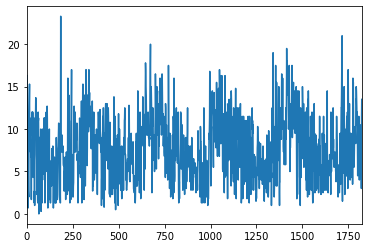

In [53]:
windspeed['Uday'][0:365*5].plot()

- 3.描述：整体的数据分布

In [54]:
windspeed.describe()

,year,month,day,Uday,Umean,Umeandir,Umax,Umaxdir
count,22979.000000,22979.000000,22979.000000,22975.000000,16300.000000,16292.000000,4716.000000,4714.000000
mean,1983.958179,6.515688,15.728839,5.493536,7.815816,4.752087,10.692706,5.016971
std,18.160617,3.445187,8.799899,2.907025,2.731974,3.736352,3.233473,4.108197
min,1953.000000,1.000000,1.000000,0.000000,1.800000,1.000000,3.400000,1.000000
25%,1968.000000,4.000000,8.000000,3.300000,5.900000,2.000000,8.400000,2.000000
50%,1984.000000,7.000000,16.000000,5.000000,7.300000,3.000000,10.600000,3.000000
75%,2000.000000,10.000000,23.000000,7.000000,9.300000,8.000000,12.800000,9.000000
max,2015.000000,12.000000,31.000000,24.500000,29.000000,16.000000,36.300000,16.000000


### 8.3.3 缺失数据处理

#### 方法一：删除含有 NaN 的缺失行

In [55]:
windspeed1 = windspeed.dropna(how='any')

In [56]:
windspeed1

,year,month,day,Uday,Umean,Umeandir,Umax,Umaxdir
18262,2003,1,1,5.5,7.0,4.0,15.9,4.0
18263,2003,1,2,4.8,7.2,3.0,13.8,4.0
18264,2003,1,3,2.5,6.0,3.0,11.4,4.0
18265,2003,1,4,4.5,6.6,3.0,15.1,4.0
18266,2003,1,5,5.3,6.7,4.0,14.4,3.0
...,...,...,...,...,...,...,...,...
22974,2015,11,26,3.6,5.3,2.0,10.4,1.0
22975,2015,11,27,4.7,6.3,1.0,12.6,3.0
22976,2015,11,28,5.3,6.5,1.0,12.1,1.0
22977,2015,11,29,2.4,5.2,1.0,9.9,1.0


In [57]:
windspeed1.describe()

,year,month,day,Uday,Umean,Umeandir,Umax,Umaxdir
count,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000
mean,2008.958625,6.487588,15.726713,3.699809,6.120178,4.892213,10.692213,5.017823
std,3.721266,3.430969,8.803409,1.401875,1.584701,3.848336,3.233745,4.108216
min,2003.000000,1.000000,1.000000,0.000000,1.800000,1.000000,3.400000,1.000000
25%,2006.000000,4.000000,8.000000,2.600000,5.000000,2.000000,8.400000,2.000000
50%,2009.000000,7.000000,16.000000,3.600000,6.100000,3.000000,10.600000,3.000000
75%,2012.000000,9.000000,23.000000,4.600000,7.100000,8.000000,12.800000,9.000000
max,2015.000000,12.000000,31.000000,12.600000,17.200000,16.000000,36.300000,16.000000


In [58]:
windspeed1[windspeed1['year'] == 2002]

,year,month,day,Uday,Umean,Umeandir,Umax,Umaxdir


- 可以看到
    - `year` 列的最小值为 `2003`，从`1953`年到`2002`年的数据均被删除，说明绝大多数的行都具有缺失值

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017C7EB81B08>]],
      dtype=object)

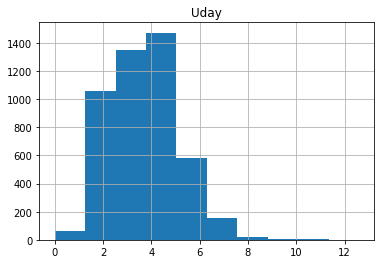

In [59]:
windspeed1[['Uday']].hist()

In [60]:
windspeed1[['Uday','Umean']]

,Uday,Umean
18262,5.5,7.0
18263,4.8,7.2
18264,2.5,6.0
18265,4.5,6.6
18266,5.3,6.7
...,...,...
22974,3.6,5.3
22975,4.7,6.3
22976,5.3,6.5
22977,2.4,5.2


### 8.3.4 数据关系规律

- 可以看到 **`Uday`** 列没有缺失，考虑使用 **`Uday`** 列和缺失列的关系，进行缺失值的填补

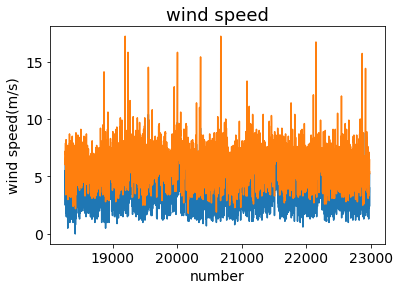

In [54]:
import matplotlib.pyplot as plt

plt.plot(windspeed1[['Uday','Umean']])#,windspeed1['Umean']);
#,windspeed1['Umean'], linewidth=5)  
plt.title("wind speed", fontsize=18)  # 指定标题，并设置标题字体大小
plt.xlabel("number", fontsize=14)  # 指定X坐标轴的标签，并设置标签字体大小
plt.ylabel("wind speed(m/s)", fontsize=14)  # 指定Y坐标轴的标签，并设置标签字体大小
plt.tick_params(axis='both', labelsize=14)  # 参数axis值为both，代表要设置横纵的刻度标记，标记大小为14
plt.show()

- `Uday` 和 `Umean` 的关系

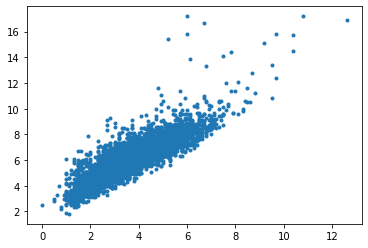

In [55]:
plt.plot(windspeed1['Uday'], windspeed1['Umean'], '.') # 风速相关性

- `Uday` 和 `Umax` 的关系

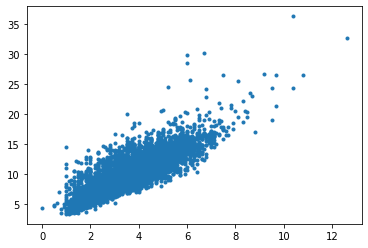

In [56]:
plt.plot(windspeed1['Uday'],windspeed1['Umax'],'.') # 风速相关性

- `Umean` 和 `Umax` 的关系

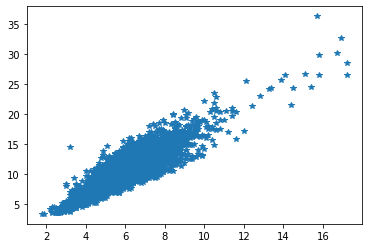

In [57]:
plt.plot(windspeed1['Umean'],windspeed1['Umax'],'*') # 风速相关性

### 8.3.5 缺失数据处理

#### 方法一：根据数据列的关系规律，进行缺失数据插补

In [61]:
# 如果某个数据缺失，可不可以根据这个规律进行插值；
windspeed1 = windspeed
kmax2mean = (windspeed1['Umax']/windspeed1['Umean']).mean()
kmax2mean

1.7394011397985654

In [62]:
kmax2day = (windspeed1['Umax']/windspeed1['Uday']).mean()
kmax2day

inf

In [63]:
windspeed1

,year,month,day,Uday,Umean,Umeandir,Umax,Umaxdir
0,1953,1,1,16.3,NaN,NaN,NaN,NaN
1,1953,1,2,13.7,NaN,NaN,NaN,NaN
2,1953,1,3,15.0,NaN,NaN,NaN,NaN
3,1953,1,4,10.3,NaN,NaN,NaN,NaN
4,1953,1,5,8.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
22974,2015,11,26,3.6,5.3,2.0,10.4,1.0
22975,2015,11,27,4.7,6.3,1.0,12.6,3.0
22976,2015,11,28,5.3,6.5,1.0,12.1,1.0
22977,2015,11,29,2.4,5.2,1.0,9.9,1.0


- 注意到出现了无穷大的现象
    - 可能有除零错误

- `Umax` 和 `Uday`

In [64]:
kmax2day = windspeed1['Umax']/windspeed1['Uday']
kmax2day.describe()

count    4715.000000
mean             inf
std              NaN
min         1.625000
25%         2.534884
50%         2.904762
75%         3.416667
max              inf
dtype: float64

In [65]:
# 无穷大替换成“数据缺失”
kmax2day.replace(-np.inf, np.nan, inplace=True) 
kmax2day.replace(np.inf, np.nan, inplace=True) 
kmax2day.dropna()
kmax2day.describe()

count    4714.000000
mean        3.073604
std         0.852619
min         1.625000
25%         2.534884
50%         2.904762
75%         3.416667
max        14.600000
dtype: float64

In [66]:
kmax2day = kmax2day.mean()
kmax2day

3.073604492899418

- `Umean` 和 `Uday`

In [67]:
# 同样的
kmean2day = windspeed1['Umean']/windspeed1['Uday']
kmean2day

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
22974    1.472222
22975    1.340426
22976    1.226415
22977    2.166667
22978    1.350000
Length: 22979, dtype: float64

In [68]:
kmean2day.describe()

count    1.629800e+04
mean              inf
std               NaN
min      1.000000e+00
25%      1.445783e+00
50%      1.636364e+00
75%      1.945455e+00
max               inf
dtype: float64

In [69]:
kmean2day.replace(-np.inf,np.nan,inplace=True) 
kmean2day.replace(np.inf,np.nan,inplace=True) 
kmean2day.dropna()
kmean2day.describe()

count    16294.000000
mean         1.785037
std          0.597672
min          1.000000
25%          1.445783
50%          1.634921
75%          1.945455
max         16.666667
dtype: float64

In [70]:
kmean2day = kmean2day.mean()
kmean2day

1.7850368220903596

In [71]:
## 最后进行缺失数据的插补
windspeed1.describe()

,year,month,day,Uday,Umean,Umeandir,Umax,Umaxdir
count,22979.000000,22979.000000,22979.000000,22975.000000,16300.000000,16292.000000,4716.000000,4714.000000
mean,1983.958179,6.515688,15.728839,5.493536,7.815816,4.752087,10.692706,5.016971
std,18.160617,3.445187,8.799899,2.907025,2.731974,3.736352,3.233473,4.108197
min,1953.000000,1.000000,1.000000,0.000000,1.800000,1.000000,3.400000,1.000000
25%,1968.000000,4.000000,8.000000,3.300000,5.900000,2.000000,8.400000,2.000000
50%,1984.000000,7.000000,16.000000,5.000000,7.300000,3.000000,10.600000,3.000000
75%,2000.000000,10.000000,23.000000,7.000000,9.300000,8.000000,12.800000,9.000000
max,2015.000000,12.000000,31.000000,24.500000,29.000000,16.000000,36.300000,16.000000


#### 缺失数据的插补

#### 1.填补前

In [72]:
windspeed1

,year,month,day,Uday,Umean,Umeandir,Umax,Umaxdir
0,1953,1,1,16.3,NaN,NaN,NaN,NaN
1,1953,1,2,13.7,NaN,NaN,NaN,NaN
2,1953,1,3,15.0,NaN,NaN,NaN,NaN
3,1953,1,4,10.3,NaN,NaN,NaN,NaN
4,1953,1,5,8.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
22974,2015,11,26,3.6,5.3,2.0,10.4,1.0
22975,2015,11,27,4.7,6.3,1.0,12.6,3.0
22976,2015,11,28,5.3,6.5,1.0,12.1,1.0
22977,2015,11,29,2.4,5.2,1.0,9.9,1.0


#### 2.填充 Umean 列

In [73]:
Uday = windspeed1['Uday']
Uday = Uday[windspeed1['Umean'].isna()]

windspeed1['Umean'][windspeed1['Umean'].isna()] = Uday * kmean2day

C:\Users\solit\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [74]:
Uday = windspeed1['Uday']
Uday = Uday[windspeed1['Umean'].isna()]

windspeed1['Umean'][windspeed1['Umean'].isna()] = Uday * kmean2day

C:\Users\solit\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


- 由于直接对 DataFrame 的切片进行赋值操作(相当于 inplace 操作)，因此会有 Warning

#### 3.填充 Umax 列

In [75]:
Uday = windspeed1['Uday']
Uday = Uday[windspeed1['Umax'].isna()]

windspeed1['Umax'][windspeed1['Umax'].isna()] = Uday * kmax2day

C:\Users\solit\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#### 4.填补后

In [76]:
windspeed1

,year,month,day,Uday,Umean,Umeandir,Umax,Umaxdir
0,1953,1,1,16.3,29.096100,NaN,50.099753,NaN
1,1953,1,2,13.7,24.455004,NaN,42.108382,NaN
2,1953,1,3,15.0,26.775552,NaN,46.104067,NaN
3,1953,1,4,10.3,18.385879,NaN,31.658126,NaN
4,1953,1,5,8.0,14.280295,NaN,24.588836,NaN
...,...,...,...,...,...,...,...,...
22974,2015,11,26,3.6,5.300000,2.0,10.400000,1.0
22975,2015,11,27,4.7,6.300000,1.0,12.600000,3.0
22976,2015,11,28,5.3,6.500000,1.0,12.100000,1.0
22977,2015,11,29,2.4,5.200000,1.0,9.900000,1.0


#### 5.前后对比：1954年风速

- 填充前的1954

In [77]:
wind1954raw = windspeed[windspeed['year'] == 1954]  #重新读取一下
wind1954raw

,year,month,day,Uday,Umean,Umeandir,Umax,Umaxdir
365,1954,1,1,9.8,17.493361,NaN,30.121324,NaN
366,1954,1,2,6.8,12.138250,NaN,20.900511,NaN
367,1954,1,3,4.0,7.140147,NaN,12.294418,NaN
368,1954,1,4,4.5,8.032666,NaN,13.831220,NaN
369,1954,1,5,8.8,15.708324,NaN,27.047720,NaN
...,...,...,...,...,...,...,...,...
725,1954,12,27,16.0,28.560589,NaN,49.177672,NaN
726,1954,12,28,12.0,21.420442,NaN,36.883254,NaN
727,1954,12,29,13.0,23.205479,NaN,39.956858,NaN
728,1954,12,30,15.0,26.775552,NaN,46.104067,NaN


- 填充后的1954

In [78]:
wind1954 = windspeed1[windspeed1['year'] == 1954]
wind1954

,year,month,day,Uday,Umean,Umeandir,Umax,Umaxdir
365,1954,1,1,9.8,17.493361,NaN,30.121324,NaN
366,1954,1,2,6.8,12.138250,NaN,20.900511,NaN
367,1954,1,3,4.0,7.140147,NaN,12.294418,NaN
368,1954,1,4,4.5,8.032666,NaN,13.831220,NaN
369,1954,1,5,8.8,15.708324,NaN,27.047720,NaN
...,...,...,...,...,...,...,...,...
725,1954,12,27,16.0,28.560589,NaN,49.177672,NaN
726,1954,12,28,12.0,21.420442,NaN,36.883254,NaN
727,1954,12,29,13.0,23.205479,NaN,39.956858,NaN
728,1954,12,30,15.0,26.775552,NaN,46.104067,NaN


#### 6.绘图：1954年风速

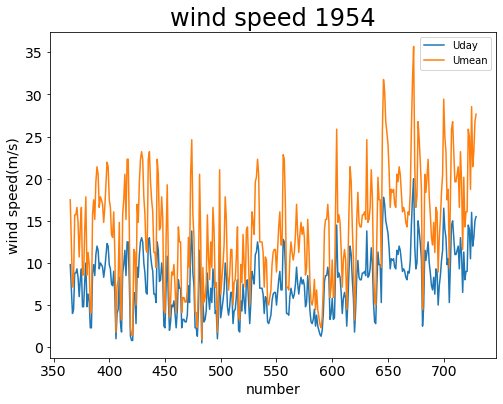

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(wind1954[['Uday','Umean']])#,windspeed1['Umean']);
#,windspeed1['Umean'], linewidth=5)  
plt.title("wind speed 1954", fontsize=24)  # 指定标题，并设置标题字体大小
plt.xlabel("number", fontsize=14)  # 指定X坐标轴的标签，并设置标签字体大小
plt.ylabel("wind speed(m/s)", fontsize=14)  # 指定Y坐标轴的标签，并设置标签字体大小
plt.tick_params(axis='both', labelsize=14)  # 参数axis值为both，代表要设置横纵的刻度标记，标记大小为14
plt.legend(['Uday', 'Umean'])
plt.show()

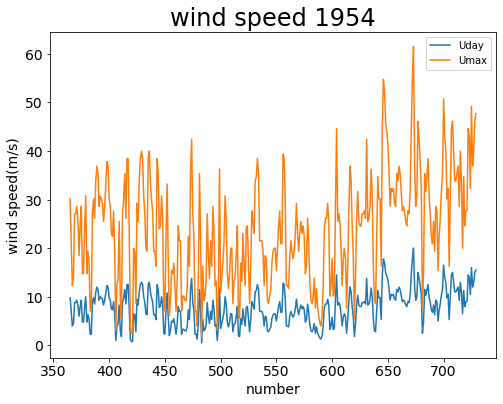

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(wind1954[['Uday','Umax']])#,windspeed1['Umean']);
#,windspeed1['Umean'], linewidth=5)  
plt.title("wind speed 1954", fontsize=24)  # 指定标题，并设置标题字体大小
plt.xlabel("number", fontsize=14)  # 指定X坐标轴的标签，并设置标签字体大小
plt.ylabel("wind speed(m/s)", fontsize=14)  # 指定Y坐标轴的标签，并设置标签字体大小
plt.tick_params(axis='both', labelsize=14)  # 参数axis值为both，代表要设置横纵的刻度标记，标记大小为14
plt.legend(['Uday', 'Umax'])
plt.show()

## 8.4 思考：如何处理噪声数据？

In [81]:
xlsx = pd.ExcelFile('时间序列.xlsx') # 文件必须存在
timedata = pd.read_excel(xlsx, index_col=None, header=None, names=["time","data"])
timedata

,time,data
0,0.00,0.000000
1,0.01,0.014000
2,0.02,0.027999
3,0.03,0.041995
4,0.04,0.055989
...,...,...
2994,29.94,-1.552172
2995,29.95,-1.547848
2996,29.96,-1.543415
2997,29.97,-1.538874


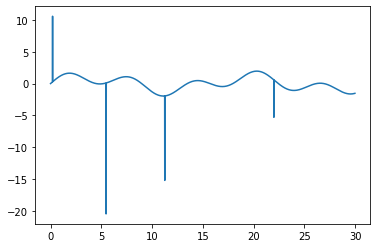

In [82]:
plt.plot(timedata['time'],timedata['data'])

(-3, 3)

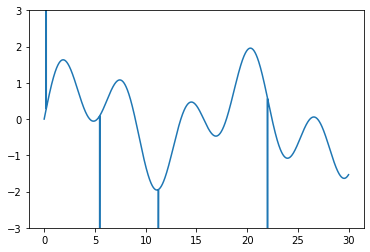

In [83]:
#放大看
plt.plot(timedata['time'],timedata['data'])
plt.ylim([-3,3]) 

### 8.4.1 寻找异常点

In [84]:
timedata.describe()  

,time,data
count,2999.000000,2999.000000
mean,14.990000,0.032165
std,8.658811,1.123785
min,0.000000,-20.500000
25%,7.495000,-0.639794
50%,14.990000,0.034682
75%,22.485000,0.789026
max,29.980000,10.590000


In [85]:
# 有没有办法可以处理这些数据呢？

In [86]:
# 方法1，利用统计信息找不正常的点

In [87]:
max1, min1  = timedata['data'].max(), timedata['data'].min()
max1, min1

(10.59, -20.5)

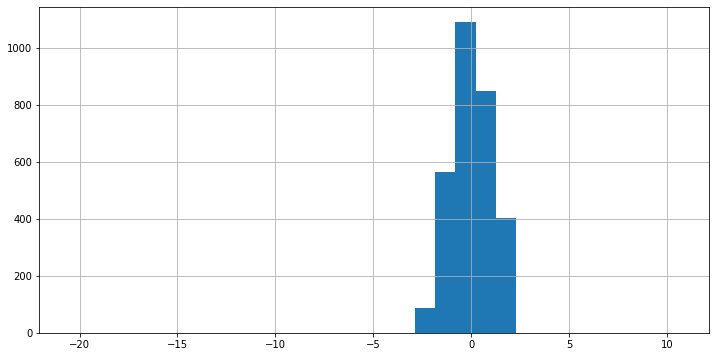

In [88]:
timedata['data'].hist(figsize=(12,6),bins=30)

In [89]:
# 取3倍方差？

In [90]:
import seaborn as sns 
# statistical data visualization http://seaborn.pydata.org/

####  箱形图是一种基于中位数，四分位数和异常值可视化数据分布的标准方法。
- 示例图。
<img src = "images\ch08\ch08-01.png" width = 1000>

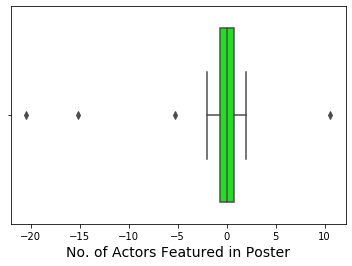

In [91]:
sns.boxplot(x=timedata['data'], color='lime')
plt.xlabel('No. of Actors Featured in Poster',fontsize=14)
plt.show()

<img src = "images\ch08\ch08-02.png" width = 500>

In [92]:
timedata1 = timedata.copy()

In [93]:
timedata1.describe()

,time,data
count,2999.000000,2999.000000
mean,14.990000,0.032165
std,8.658811,1.123785
min,0.000000,-20.500000
25%,7.495000,-0.639794
50%,14.990000,0.034682
75%,22.485000,0.789026
max,29.980000,10.590000


In [94]:
limit_up, limit_bottom = timedata1['data'].mean() + timedata1['data'].std()*3, timedata1['data'].mean() - timedata1['data'].std() * 3
limit_up, limit_bottom 

(3.4035210893940415, -3.339190280835512)

In [95]:
timedata1[np.bitwise_and(timedata1['data'] > limit_bottom,timedata1['data'] < limit_up)].describe()  #统计一下符合的数据


,time,data
count,2995.000000,2995.000000
mean,14.997025,0.042372
std,8.657407,0.999572
min,0.000000,-1.957684
25%,7.505000,-0.635508
50%,15.000000,0.034748
75%,22.495000,0.789026
max,29.980000,1.957683


In [96]:
condition = np.bitwise_or(timedata1['data'] < limit_bottom,timedata1['data'] > limit_up)
condition

0       False
1       False
2       False
3       False
4       False
        ...  
2994    False
2995    False
2996    False
2997    False
2998    False
Name: data, Length: 2999, dtype: bool

### 8.4.2 平均值填充

In [97]:
timedata1['data'][condition] = timedata1['data'].mean()
timedata1.describe()

,time,data
count,2999.000000,2999.000000
mean,14.990000,0.042358
std,8.658811,0.998905
min,0.000000,-1.957684
25%,7.495000,-0.633428
50%,14.990000,0.034418
75%,22.485000,0.787112
max,29.980000,1.957683


In [98]:
timedata1['data'][condition] = timedata1['data'].mean()

In [99]:
timedata1[condition]

,time,data
20,0.20,0.042358
547,5.47,0.042358
1125,11.25,0.042358
2200,22.00,0.042358


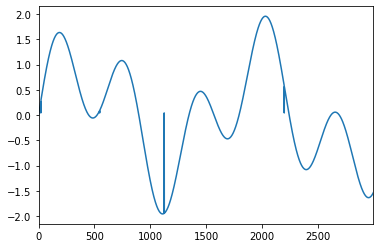

In [100]:
timedata1['data'].plot() # 太难受了

### 8.4.3 前后数据填充

In [101]:
timedata1['data'][condition] = np.nan
timedata1[condition]

,time,data
20,0.20,NaN
547,5.47,NaN
1125,11.25,NaN
2200,22.00,NaN


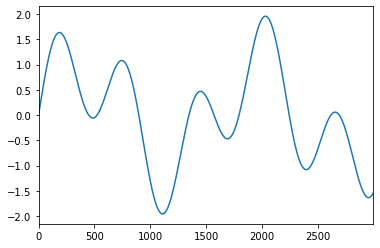

In [102]:
timedata1.fillna(method= 'pad')
timedata1['data'].plot() # 这个方法比较优秀

### 8.4.4 滤波方法

In [103]:
# 如果噪点比较多呢？

In [104]:
from scipy import signal

timedata3 = timedata.copy()

In [105]:
b, a = signal.butter(8, 0.01, 'lowpass') 
filtedData = signal.filtfilt(b, a, timedata3['data'] )


In [106]:
help(signal.butter)

Help on function butter in module scipy.signal.filter_design:

butter(N, Wn, btype='low', analog=False, output='ba', fs=None)
    Butterworth digital and analog filter design.
    
    Design an Nth-order digital or analog Butterworth filter and return
    the filter coefficients.
    
    Parameters
    ----------
    N : int
        The order of the filter.
    Wn : array_like
        A scalar or length-2 sequence giving the critical frequencies.
        For a Butterworth filter, this is the point at which the gain
        drops to 1/sqrt(2) that of the passband (the "-3 dB point").
    
        For digital filters, `Wn` are in the same units as `fs`.  By default,
        `fs` is 2 half-cycles/sample, so these are normalized from 0 to 1,
        where 1 is the Nyquist frequency.  (`Wn` is thus in
        half-cycles / sample.)
    
        For analog filters, `Wn` is an angular frequency (e.g. rad/s).
    btype : {'lowpass', 'highpass', 'bandpass', 'bandstop'}, optional
        The t

(-2, 2)

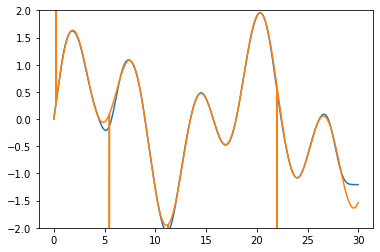

In [107]:
plt.plot(timedata['time'],filtedData,timedata['time'],timedata3['data'])
plt.ylim([-2,2])

### 8.4.5 缺失时间点

In [108]:
timedata = pd.read_excel('时间序列.xlsx', index_col=None, header=None, names=['time', 'data'])
timedata

,time,data
0,0.00,0.000000
1,0.01,0.014000
2,0.02,0.027999
3,0.03,0.041995
4,0.04,0.055989
...,...,...
2994,29.94,-1.552172
2995,29.95,-1.547848
2996,29.96,-1.543415
2997,29.97,-1.538874


In [109]:
import random
deleIndex = random.sample(range(1, len(timedata)), 50)

In [110]:
timedata5 = timedata.drop(index=deleIndex)
timedata5.describe()

,time,data
count,2949.000000,2949.000000
mean,15.022815,0.030712
std,8.645867,1.125303
min,0.000000,-20.500000
25%,7.540000,-0.641623
50%,15.040000,0.033082
75%,22.500000,0.786168
max,29.980000,10.590000


In [111]:
# 这些位置的点故意删掉，形成缺失数据
deleTimes = set(np.arange(0, 2998+1, 1)) - set(np.array(timedata5['time']*100+0.01).astype(int))  # 注：+0.01 考虑浮点转整型的精度损失

In [112]:
deleTimes = np.array(list(deleIndex)) / 100
deleTimes

array([14.11,  8.07, 17.94,  0.08, 27.7 , 17.  , 27.43, 10.11, 24.58,
        1.79, 29.88, 26.57,  3.07, 22.55, 19.56,  4.51, 25.75, 19.12,
        0.13, 11.04, 12.16,  5.5 , 19.96, 10.43, 14.38,  1.48,  8.09,
       18.48,  7.94, 22.94,  3.55,  4.99, 29.84,  9.6 , 19.59,  8.21,
        4.05, 20.87,  0.74, 29.8 ,  4.31, 13.71,  4.56, 17.83, 23.04,
        5.87,  6.14,  2.24,  1.02, 10.42])

In [113]:
missingData = pd.DataFrame(data={'time': deleTimes})
missingData

,time
0,14.11
1,8.07
2,17.94
3,0.08
4,27.70
5,17.00
6,27.43
7,10.11
8,24.58
9,1.79


In [114]:
timeComple = timedata5.append(missingData, ignore_index=True, sort=True).sort_values('time')
timeComple

,data,time
0,0.000000,0.00
1,0.014000,0.01
2,0.027999,0.02
3,0.041995,0.03
4,0.055989,0.04
...,...,...
2944,-1.552172,29.94
2945,-1.547848,29.95
2946,-1.543415,29.96
2947,-1.538874,29.97


In [115]:
timeComple[timeComple['time'].isin(deleTimes)]

,data,time
2952,NaN,0.08
2967,NaN,0.13
2987,NaN,0.74
2997,NaN,1.02
2974,NaN,1.48
2958,NaN,1.79
2996,NaN,2.24
2961,NaN,3.07
2979,NaN,3.55
2985,NaN,4.05


In [116]:
## 大家可以尝试填充这些点
